In [1]:
library(clusterProfiler)
library(org.Mm.eg.db)
library(dplyr)
library(enrichplot)
library(ggplot2)



clusterProfiler v4.6.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, p

In [2]:
# Read the previously saved CSV file of differentially expressed genes
data <- read.csv("SSGATE_100DEgene_SCS_MT.csv", header = TRUE)
geneslist0 <- data %>%
  filter(Pval < 0.01 & logfoldchanges > 1) %>%
  with(split(Gene_name, Group))
gene_list0 <- geneslist0$'0'
length(gene_list0)
ego0 <- enrichGO(gene_list0, OrgDb = 'org.Mm.eg.db', ont = 'BP', keyType = "SYMBOL", pvalueCutoff = 0.05)

data <- read.csv("SSGATE_100DEgene_SCS_MT.csv", header = TRUE)
geneslist1 <- data %>%
  filter(Pval < 0.05 & logfoldchanges > 1) %>%
  with(split(Gene_name, Group))
gene_list1 <- geneslist1$'1'
length(gene_list1)

ego1 <- enrichGO(gene_list1, OrgDb = 'org.Mm.eg.db', ont = 'BP', keyType = "SYMBOL", pvalueCutoff = 0.05)

data <- read.csv("SSGATE_100DEgene_SCS_MT.csv", header = TRUE)
geneslist2 <- data %>%
  filter(Pval < 0.01 & logfoldchanges > 1) %>%
  with(split(Gene_name, Group))

gene_list2 <- geneslist2$'2'
length(gene_list2)

ego2 <- enrichGO(gene_list2, OrgDb = 'org.Mm.eg.db', ont = 'BP', keyType = "SYMBOL", pvalueCutoff = 0.05)

data <- read.csv("SSGATE_100DEgene_SCS_MT.csv", header = TRUE)
geneslist3 <- data %>%
  filter(Pval < 0.01 & logfoldchanges > 1) %>%
  with(split(Gene_name, Group))
gene_list3 <- geneslist3$'3'
# gene_list <- gene_list[1:50]
length(gene_list3)
ego3 <- enrichGO(gene_list3, OrgDb = 'org.Mm.eg.db', ont = 'BP', keyType = "SYMBOL", pvalueCutoff = 0.05)

data <- read.csv("SSGATE_100DEgene_SCS_MT.csv", header = TRUE)
geneslist4 <- data %>%
  filter(Pval < 0.01 & logfoldchanges > 1) %>%
  with(split(Gene_name, Group))

gene_list4 <- geneslist4$'4'
length(gene_list4)

ego4 <- enrichGO(gene_list4, OrgDb = 'org.Mm.eg.db', ont = 'BP', keyType = "SYMBOL", pvalueCutoff = 0.05)


[1] 94

[1] 9

[1] 88

[1] 12

[1] 51

In [10]:
data <- read.csv("SSGATE_100DEgene_SCS_MT.csv", header = TRUE)
# gene_list5 <- data %>%
#   filter(Pval < 0.05 & logfoldchanges > 1) %>%
#   with(split(Gene_name, Group))

geneslist5 <- data %>% with(split(Gene_name, Group))

gene_list5 <- geneslist5$'5'
# gene_list5 <- geneslist5[1:50]
length(gene_list5)

ego5 <- enrichGO(gene_list5, OrgDb = 'org.Mm.eg.db', ont = 'BP', keyType = "SYMBOL", pvalueCutoff = 0.05)


[1] 100

In [19]:
# Assume that you already have six ego objects with GO enrichment analysis results
ego_list <- list(ego0, ego1, ego2, ego3, ego4, ego5)

# Define the corresponding reserved GO terms list
selected_terms_list <- list(
  c("positive T cell selection", "activation of immune response"),  # Cell Type 0
  c("B cell activation", "B cell receptor signaling pathway"),          # Cell Type 1
  c("lymphocyte mediated immunity", "antigen processing and presentation"),  # Cell Type 2
  c("anion transmembrane transport", "chloride transmembrane transport"),  # Cell Type 3
  c("T cell mediated immunity", "negative regulation of immune system process"),  # Cell Type 4
  c("lymphocyte differentiation", "T cell differentiation")                        # Cell Type 5

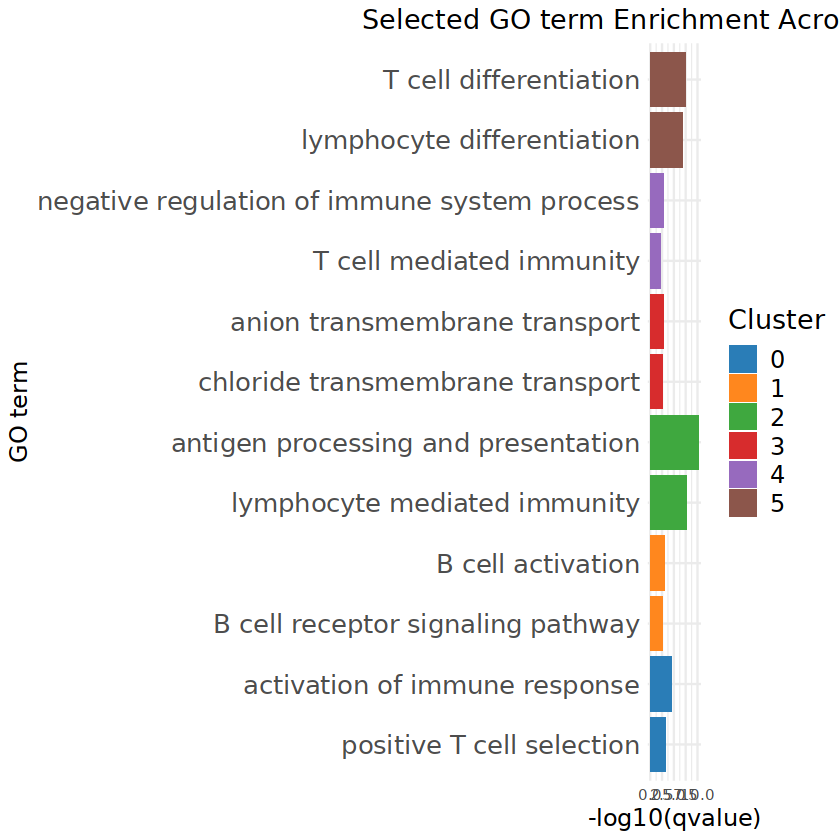

In [24]:
# Create an empty data frame to store all results
all_results <- data.frame()

# Filter each ego object and keep the desired GO terms
for (i in 1:length(ego_list)) {
  ego <- ego_list[[i]]
  selected_terms <- selected_terms_list[[i]]
  
  go_terms <- as.data.frame(ego)
  filtered_go_terms <- go_terms %>% filter(Description %in% selected_terms)
  
  # Add group information
  filtered_go_terms$Group <- as.factor(as.character(i - 1))
  
  # Splicing results
  all_results <- rbind(all_results, filtered_go_terms)
}

# Expand all GO terms into one-dimensional vectors in the specified order and remove duplicates
all_terms <- unique(unlist(selected_terms_list))

# Set GO terms as factors and arrange them in the specified order
all_results$Description <- factor(all_results$Description, levels = all_terms)

# Calculate the sorting factor
all_results <- all_results %>%
  group_by(Group) %>%
  mutate(Description = factor(Description, levels = Description[order(-log10(qvalue))])) %>%
  ungroup()

colors <- c('#2A7DB7', '#FF871E', '#3FA83F', '#D72C2D', '#976ABE', '#8C564B')

# Draw a bar chart
ggplot(all_results, aes(x = -log10(qvalue), y = Description, fill = Group)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_manual(values = colors, labels = as.character(0:5)) +
  labs(x = "-log10(qvalue)", y = "GO term", fill = "Cell Type") +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 15),
        axis.title = element_text(size = 14),
        plot.title = element_text(hjust = 0.5, size = 16),
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14)) +
  ggtitle("Selected GO term Enrichment Across Clusters") +
  guides(fill = guide_legend(title = "Cluster"))

# Save the image and specify a larger size
ggsave("GO_term_enrichment.png", width = 14, height = 10)
ggsave("GO_term_enrichment.pdf", width = 14, height = 10)
